## Preparing the data

In [ ]:
!pip install fastai==1.0.52
from fastai.text import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
pt=path/'Thesis Data'/'full doc csv'
dt=path/'Thesis Data'/'Our dataset'
subsets=dt/'subsets'

In [0]:
bs=32

In [0]:
data_lm = load_data(pt, 'full_doc_data_lm.pkl',bs=bs)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


##  6 Authors

### LM

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(subsets, '6train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('6train_word_lm.pkl')

In [0]:
data_lm_AA = load_data(subsets, '6train_word_lm.pkl',bs=bs)
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(pt/'models'/'word_news_lm_30');

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


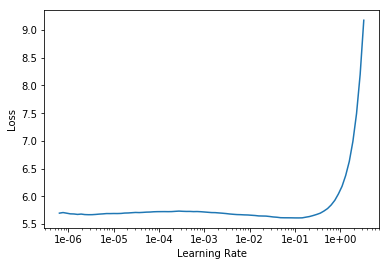

In [0]:
learn.lr_find()
learn.recorder.plot()

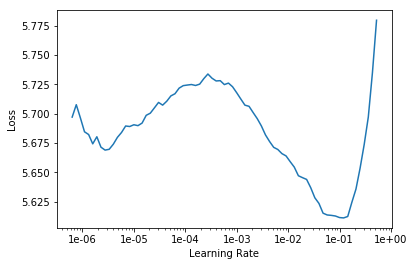

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.freeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('6train_lm_head');
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2)
learn.save('6train_lm_body_1');
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-2)
learn.save('6train_lm_body_2');
learn.unfreeze()
learn.fit_one_cycle(4, 1e-2)
learn.save('6train_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,4.958354,4.827487,0.248879,07:31
1,4.707387,4.688944,0.258335,07:45


epoch,train_loss,valid_loss,accuracy,time
0,4.787868,4.745176,0.258471,07:52
1,4.508382,4.571882,0.271531,07:51


epoch,train_loss,valid_loss,accuracy,time
0,4.756358,4.718398,0.261224,08:15
1,4.453580,4.520472,0.277579,08:15


epoch,train_loss,valid_loss,accuracy,time
0,4.655127,4.717733,0.260231,08:33
1,4.652603,4.649709,0.265473,08:33
2,4.415435,4.492728,0.278784,08:33
3,4.166722,4.449658,0.282936,08:33


In [0]:
learn.load('6train_lm_body_3');
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('6train_lm_body_4');

epoch,train_loss,valid_loss,accuracy,time
0,4.085526,4.452430,0.282702,08:29
1,4.087307,4.439222,0.283906,08:34
2,3.983384,4.439068,0.284367,08:34
3,3.974684,4.443350,0.284006,08:34


In [0]:
learn.load('6train_lm_body_4');
learn.save_encoder('6train_lm_enc')

### Classifier

In [0]:
data_clas = TextClasDataBunch.from_csv(subsets , '6train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('6train_word_clas.pkl')

In [0]:
data_clas.show_batch()

text,target
"xxbos ছিল , দু’দিন পার হবার আগেই ওর xxunk হবে এবং সে বাড়িতে ফিরে আসবে । আমাকে জোর খাটিয়ে কিছু করতে হবে না । কিন্তু সে বাসায় ফিরছে না । আপনি এই চিঠি xxunk এমন ব্যবস্থা করবেন যেন সে বাড়িতে ফিরে আসে । আমি একটি ব্যাপার খুব পরিষ্কার করে আপনাকে জানাতে চাই , তা হল — ও বোকা হোক , যা হোক , ওকে আমি অসম্ভব ভালবাসি । ভালবাসা মাপার",humayun_ahmed
"xxbos বিরক্ত করবেন না । ’ আমাকে xxunk টেলিফোন করতে হবে । রিকশা নিয়ে xxunk স্টোরে উপস্থিত হলাম । নতুন ছেলেটা কঠিন চোখে তাকাচ্ছে । আমি বললাম , বল পয়েন্ট কিনতে এসেছি । এই নিন দশ টাকা । ছেলেটার কঠিন চোখে ভয়ের ছায়া পড়ল । সে আমাকে বুঝতে পারছে না । বুঝতে পারছে না বলেই ভয় পাচ্ছে । ‘ কয়েকদিন আগে এক ম্যানেজার সাহেবকে কলম কিনতে xxunk । এসেছিল ?",humayun_ahmed
"xxbos যা । ” “ কেউ নিবে না তো ? ” “ না কেউ নিবে না । এটা একটা নেওয়ার মত xxunk না । ” মিঠুন গম্ভীর মুখে বলল , “ xxunk পড়ে ভেঙে গেলে সর্বনাশ হয়ে যাবে । ” “ ঠিক আছে আমি ব্যবস্থা করে দিচ্ছি । ” বলে আমি আমার ছোট একটা বাক্স এনে xxunk কাপড়ে জড়িয়ে বাক্সের ভিতরে রেখে দিলাম , বললাম । এখন এটা পড়ে ভেঙ্গে",MZI
"xxbos খুবই ভাল লাগে ? ’ ‘ এইসব ভাল লাগার ব্যাপার ? তুই একটা ঝামেলায় xxunk … . ‘ আমি কোন ঝামেলায় পড়েনি মামা । ’ ‘ তোর xxunk একজন পড়েছে । ব্যাপার একই । ভাই xxunk , বন্ধু এদের না দেখলে দেখব কাকে ? পাড়ার লোককে দেখব ? ‘ মামা কিছু xxunk ? হোটেল সারারাত খোলা থাকে । চলুন যাই । ’ ‘ না কিছু খাব না । ফজরের",humayun_ahmed
"xxbos ভয়ে xxunk গিলে কথা xxunk না । আমি আজ এই স্পষ্ট বলে যাচ্ছি , xxunk xxunk জন্যে সংসারে আর কারো দরকার হবে না – তুমি একাই পারবে । আমরা থাকলে তবু যদি - বা কিছু ঠাণ্ডা রাখতে xxunk , কিন্তু সে তোমার xxunk না । ” মধুসূদন গর্জন করে উঠে বললে , “ xxunk করিস নে । xxunk যাবার কথা xxunk ওকে xxunk । ” “ এ কথা ভাবতেই",robindronath


In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [0]:
learn_cls.load_encoder('6train_lm_enc')

In [0]:
learn_cls.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


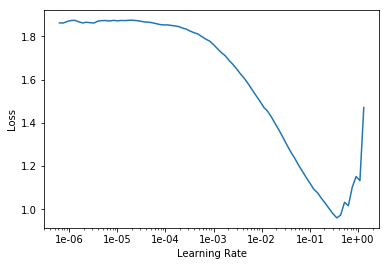

In [0]:
learn_cls.lr_find()
learn_cls.recorder.plot()

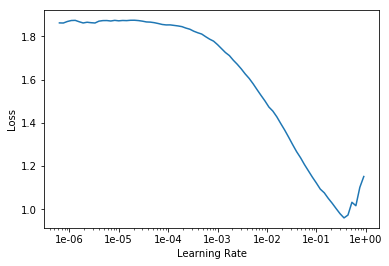

In [0]:
learn_cls.recorder.plot(skip_end=7)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('6train_word_cls_1')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('6train_word_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn_cls.save('6train_word_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('6train_word_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.142642,0.011230,0.996216,03:57
1,0.024978,0.011423,0.996216,03:55


epoch,train_loss,valid_loss,accuracy,time
0,0.045933,0.018766,0.995270,04:34
1,0.013235,0.023138,0.995270,04:33


epoch,train_loss,valid_loss,accuracy,time
0,0.011653,0.031602,0.995270,06:44
1,0.013290,0.023691,0.994324,06:48


epoch,train_loss,valid_loss,accuracy,time
0,0.002842,0.016238,0.996216,08:44
1,0.007329,0.015695,0.996216,08:46
2,0.005646,0.015032,0.997162,08:46
3,0.002743,0.015049,0.997162,08:45


### Test

In [0]:
def testing(dts):
  df = pd.read_csv(dts) 
  text_array = df["text"].tolist()
  print(len(text_array))

  final_preds = []

  for text in text_array:
      preds = learn_cls.predict(text)
      final_preds.append(str(preds[0]))

  targets = df["label"].tolist()

  err=[]
  count =0;
  tst = len(text_array)

  for i in range(tst):
      if(targets[i]==final_preds[i]):
          count = count+1
      else:
  #         print(targets[i] + ", " + final_preds[i] + ';')
          err.append((targets[i],final_preds[i]))
  print("Accuracy: ")
  print(count/tst)
  print(err)
  
  return final_preds,targets

In [0]:
pred,targ = testing(subsets/'6test.csv')

1320
Accuracy: 
0.996969696969697
[('humayun_ahmed', 'shomresh'), ('humayun_ahmed', 'shorotchandra'), ('humayun_ahmed', 'MZI'), ('shomresh', 'robindronath')]


In [0]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average=None) #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(array([0.997732, 0.993135, 0.997732, 0.995455, 0.997732, 1.      ]),
 0.9969644726346263)

##  8 Authors

### LM

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(subsets, '8train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('8train_word_lm.pkl')

In [0]:
data_lm_AA = load_data(subsets, '8train_word_lm.pkl',bs=bs)
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(pt/'models'/'word_news_lm_30');

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


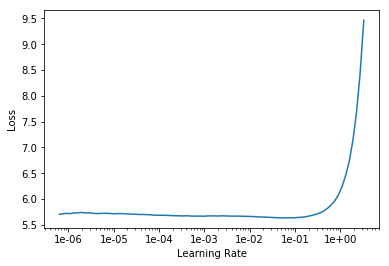

In [0]:
learn.lr_find()
learn.recorder.plot()

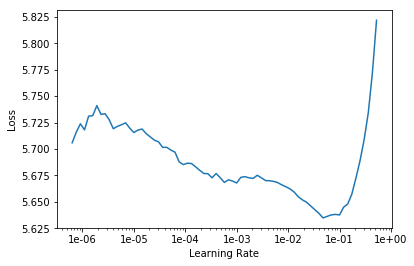

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.freeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('8train_lm_head');
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2)
learn.save('8train_lm_body_1');
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-2)
learn.save('8train_lm_body_2');
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('8train_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,5.063671,4.962101,0.237463,16:51
1,4.846894,4.812362,0.248533,16:49


epoch,train_loss,valid_loss,accuracy,time
0,4.867321,4.884098,0.247567,17:05
1,4.697634,4.706554,0.259675,17:05


epoch,train_loss,valid_loss,accuracy,time
0,4.868570,4.864226,0.249884,17:55
1,4.555605,4.656592,0.265597,17:53


epoch,train_loss,valid_loss,accuracy,time
0,4.414937,4.638802,0.266607,18:37
1,4.392800,4.604104,0.269306,18:38
2,4.271932,4.584065,0.271029,18:44
3,4.185538,4.588463,0.270852,18:44


In [0]:
learn.load('8train_lm_body_3');
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('8train_lm_body_4');

epoch,train_loss,valid_loss,accuracy,time
0,4.243512,4.596003,0.270180,18:42
1,4.272329,4.578660,0.271209,18:43
2,4.156961,4.570635,0.272372,18:42
3,4.064596,4.577924,0.272088,18:43


In [0]:
learn.save_encoder('8train_lm_enc')

### Classifier

In [0]:
data_clas = TextClasDataBunch.from_csv(subsets , '8train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('8train_word_clas.pkl')

In [0]:
data_clas.show_batch()

text,target
"xxbos xxunk । xxunk , xxunk , পরস্পরকে অবিশ্বাস , xxunk চক্রান্ত , গুপ্তচরবৃত্তি একদিন তাদের টেনে নিয়ে যাবে xxunk তলায় । এ আমি স্পষ্ট দেখতে পাচ্ছি । এই xxunk xxunk xxunk xxunk মধ্যে দিনরাত xxunk বিষাক্ত হাওয়ায় কখনোই নিজের স্বভাবে সেই xxunk রক্ষা করতে পারব না যাতে পৃথিবীতে কোনো বড়ো কাজ করতে পারা যায় । ” “ আচ্ছা অন্তু , তুমি যাকে xxunk বল সে কি আমাদেরই দেশে ?",robindronath
"xxbos বসব ? ’ ‘ বসুন । ’ ‘ শুরু করব ? ’ ‘ কী শুরু করতে চাচ্ছেন ? ’ ‘ জীবন - কাহিনী । আমার বাবা কি করে আমাকে xxunk বানানো চেষ্টা করতে লাগলেন , তিনি কতটুকু পারলেন , কতটুকু পারলেন না । অর্থাৎ ঐ রাতে যেখানে শেষ করেছিলাম , সেখান থেকে শুরু … ’ ‘ হিমু সাহেব । ’ ‘ জ্বি ? ’ ‘ আমার একটি মেয়ে অসুস্থ",humayun_ahmed
xxbos ভাই অংক শিখতে পারেননি । টাকাটা দিতে পারলাম না । কিছু মনে করবেন না । আবদুর রশীদ দাঁড়িয়ে আছে — আমি হাঁটা ধরেছি । মেসে ফিরে যাব । সারাদিন কিছু না খাওয়াতে xxunk xxunk পাক দিচ্ছে । মেসে রান্না হয়েছে কি - না খোঁজ নিতে হবে । মেসের ভাত সকাল সকাল নেমে যায় । ভাত নেমে গেলে একটা ডিম ভেজে দিতে বলব । আগুন - গরম ভাত xxunk দিয়ে,humayun_ahmed
"xxbos ‘ গুড – হয়েছে । আর কী ? ’ ‘ xxunk xxunk গাড়ির ধোয়া , কার্বন xxunk কিছু নেই । ’ ‘ ভেরি গুড । ’ ‘ লোকজন বেশি হাঁটাহাঁটি করছে , তাদের স্বাস্থ্য ভালো হচ্ছে । ডায়াবেটিস রোগীর সংখ্যা কমছে । ’ ‘ xxunk আর কী ? ’ ‘ আরবদের কাছ থেকে আমাদের পেট্রোল কিনতে হচ্ছে না । কিছু ফরেন কারেন্সি বেঁচে যাচ্ছে । ’ ‘ হুঁ ।",humayun_ahmed
"xxbos সময় মনে হল রুপার চিঠি আমার সঙ্গে নেই । xxunk বাসায় পুরানো কাপড়ের সঙ্গে ফেলে এসেছি । xxunk xxunk নিশ্চয়ই xxunk বাড়িতে চলে গেছে । মাথার xxunk বাড়ছে । এই অসহ্য তীব্র xxunk উৎস কি ? তীব্র আনন্দ যিনি দেন , তীব্র xxunk কি তাঁরই দেয়া ? কিন্তু তা তো হবার কথা না । যিনি পরম xxunk , ব্যথা তাঁর সৃষ্টি হতে পারে না । পাশের ঘরে হৈচৈ হচ্ছে",humayun_ahmed


In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [0]:
learn_cls.load_encoder('8train_lm_enc')

In [0]:
learn_cls.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


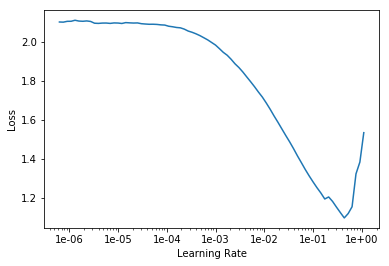

In [0]:
learn_cls.lr_find()
learn_cls.recorder.plot()

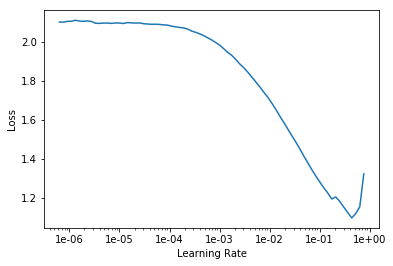

In [0]:
learn_cls.recorder.plot(skip_end=7)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('8train_word_cls_1')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.8**4),1e-2), moms=(0.8,0.7))
learn_cls.save('8train_word_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.8**4),5e-3), moms=(0.8,0.7))
learn_cls.save('8train_word_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.8**4),1e-3), moms=(0.8,0.7))
learn_cls.save('8train_word_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.129889,0.018999,0.996641,04:23
1,0.030894,0.018553,0.994962,04:23


epoch,train_loss,valid_loss,accuracy,time
0,0.030476,0.023247,0.994962,05:09
1,0.014966,0.017678,0.996641,05:10


epoch,train_loss,valid_loss,accuracy,time
0,0.014010,0.016272,0.993283,07:35
1,0.005529,0.009376,0.997481,07:39


epoch,train_loss,valid_loss,accuracy,time
0,0.004624,0.010430,0.997481,09:56
1,0.004289,0.009482,0.997481,09:55
2,0.001717,0.008487,0.997481,09:54
3,0.007103,0.008676,0.996641,09:53


### Test

In [0]:
pred,targ = testing(subsets/'8test.csv')

1496
Accuracy: 
0.9953208556149733
[('MZI', 'humayun_ahmed'), ('shorotchandra', 'robindronath'), ('robindronath', 'shunil_gongopaddhay'), ('humayun_ahmed', 'MZI'), ('humayun_ahmed', 'shorotchandra'), ('humayun_ahmed', 'MZI'), ('shomresh', 'shirshendu')]


In [0]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average=None) #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(array([0.992   , 0.989247, 0.994652, 0.997333, 0.997319, 0.994652, 0.997333, 1.      ]),
 0.9953172282726743)

##  10 Authors

### LM

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(subsets, '10train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('10train_word_lm.pkl')

In [0]:
data_lm_AA = load_data(subsets, '10train_word_lm.pkl',bs=bs)
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(pt/'models'/'word_news_lm_30');

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


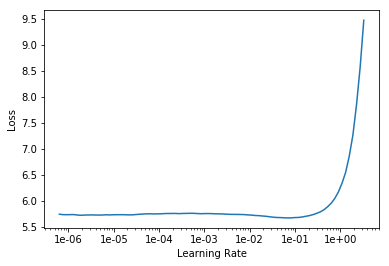

In [0]:
learn.lr_find()
learn.recorder.plot()

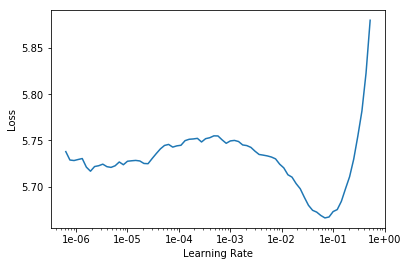

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.freeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('10train_lm_head');
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2)
learn.save('10train_lm_body_1');
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-2)
learn.save('10train_lm_body_2');
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('10train_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,5.037817,4.910308,0.243274,10:19
1,4.827927,4.766128,0.253291,10:21


epoch,train_loss,valid_loss,accuracy,time
0,4.911331,4.832219,0.253689,10:31
1,4.635109,4.654671,0.266452,10:31


epoch,train_loss,valid_loss,accuracy,time
0,4.891569,4.810841,0.256701,11:04
1,4.616623,4.595618,0.273156,11:03


epoch,train_loss,valid_loss,accuracy,time
0,4.468725,4.576111,0.274099,11:32
1,4.380704,4.538946,0.277153,11:32
2,4.245788,4.517110,0.278982,11:32
3,4.200659,4.518384,0.278887,11:32


In [0]:
learn.load('10train_lm_body_3');
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('10train_lm_body_4');

epoch,train_loss,valid_loss,accuracy,time
0,4.268596,4.524675,0.278289,11:31
1,4.245841,4.507379,0.279961,11:32
2,4.126464,4.496939,0.281044,11:32
3,4.092718,4.501268,0.280828,11:31


In [0]:
learn.save_encoder('10train_lm_enc')

### Classifier

In [0]:
data_clas = TextClasDataBunch.from_csv(subsets , '10train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('10train_word_clas.pkl')

In [0]:
data_clas.show_batch()

text,target
"xxbos সিক্রেট রাখব , তাহলেই তো হলো । ’ ‘ না xxunk , আমি চিঠি পড়ব না । ’ ‘ পড়ব না বললে হবে না । পড়তেই হবে । দাঁড়াও আমি নিয়ে আসছি । যে আলো আছে তাতে দিব্যি পড়তে পারবে । ’ xxunk ঘর থেকে চিঠি নিয়ে এল । রানু চিঠিটি হাতে নিয়ে স্তম্ভিত হয়ে দাঁড়িয়ে রইল । xxunk অবাক হয়ে বলল , ‘ কী হয়েছে ? ’ ‘",humayun_ahmed
"xxbos ব্যোমকেশ বিরক্ত হইয়া xxunk , ‘ তুমি যেতে xxunk । xxunk , এবার আপনার xxunk ডেকে পাঠান । ’ xxunk xxunk xxunk , ‘ xxunk ডেকে দে । ’ xxunk xxunk গেল । কিছুক্ষণ পরে চুমকি প্রবেশ xxunk , xxunk দৃঢ়তার সহিত টেবিলের পাশে xxunk xxunk । xxunk তাহার মুখে আশঙ্কার ছায়া আরও গাঢ় xxunk , আমাদের দিকে চোখ xxunk আবার নত xxunk । ব্যোমকেশ সহজ সুরে xxunk ,",shordindu
"xxbos স্যালুট করল । xxunk xxunk , জাঁদরেল xxunk , ইয়া xxunk । xxunk তার আপাদমস্তক নিরীক্ষণ করে xxunk , ‘ হ্যাঁ , জেনারেল বটে । তুমি হোটেলের সদরে পাহারা দাও ? ’ xxunk xxunk , ‘ জি । সকালে xxunk থেকে xxunk , বিকেলে পাঁচটা থেকে দশটা আমার ডিউটি । ‘ ‘ হোটেলে যারা অতিথিদের সঙ্গে দেখা করতে আসে তাদের নাম - ধাম তুমি লিখে রাখ ? ’ ‘",shordindu
"xxbos ‘ কি হল এতক্ষণ ধরে ? ’ ব্যোমকেশ স্বর্গীয় xxunk করিয়া xxunk , ‘ xxunk , xxunk যা xxunk ? ’ ধমক দিয়া xxunk , ‘ কথা চাপা দিও না । পাঁচ ঘণ্টা ধরে কি কথা হল ? ’ ব্যোমকেশ xxunk xxunk , ‘ xxunk xxunk কি বলতে আছে ? তবে এমন কোনও কথা হয়নি যা তুমি জান না । ’ ‘ হত্যাকারী কে ? ’ ‘ xxunk দে",shordindu
"xxbos ওঁর দেখাশোনার ত্রুটি হয় না । ’ xxunk ঘরে দেখলাম প্রকাণ্ড উঁচু খাট , আর তার মাথার দিকে ঘরের কোনায় আলমারি । সেটা খুলে তার xxunk থেকে একটা নীল xxunk বাক্স বার করে বললেন , ‘ xxunk দোকান থেকে এই xxunk দিনে xxunk এই xxunk রাখার জন্য । ’ xxunk খুলে নীল আর সবুজ রং মেশানো লিচুর সাইজের একটা ঝলমলে পাথর বার করে xxunk ফেলুদার হাতে দিয়ে বললেন —",shottojit_roy


In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [0]:
learn_cls.load_encoder('10train_lm_enc')

In [0]:
learn_cls.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


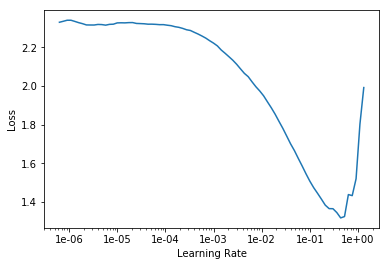

In [0]:
learn_cls.lr_find()
learn_cls.recorder.plot()

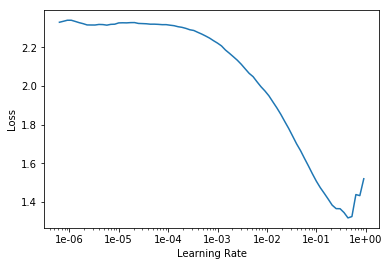

In [0]:
learn_cls.recorder.plot(skip_end=7)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('10train_word_cls_1')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.8**4),1e-2), moms=(0.8,0.7))
learn_cls.save('10train_word_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.8**4),5e-3), moms=(0.8,0.7))
learn_cls.save('10train_word_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.8**4),1e-3), moms=(0.8,0.7))
learn_cls.save('10train_word_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.159342,0.022469,0.991170,02:50
1,0.046522,0.016529,0.994113,02:53


epoch,train_loss,valid_loss,accuracy,time
0,0.049133,0.024208,0.993378,03:15
1,0.017619,0.014105,0.994849,03:15


epoch,train_loss,valid_loss,accuracy,time
0,0.018496,0.021498,0.993378,04:39
1,0.020109,0.016500,0.994113,04:37


epoch,train_loss,valid_loss,accuracy,time
0,0.008979,0.011518,0.995585,05:51
1,0.008221,0.008662,0.997057,05:49
2,0.007031,0.009576,0.995585,05:45
3,0.004354,0.010877,0.995585,05:45


### Test

In [0]:
pred,targ = testing(subsets/'10test.csv')

1700
Accuracy: 
0.9958823529411764
[('shordindu', 'robindronath'), ('shordindu', 'robindronath'), ('shottojit_roy', 'MZI'), ('MZI', 'humayun_ahmed'), ('robindronath', 'shorotchandra'), ('humayun_ahmed', 'shordindu'), ('shunil_gongopaddhay', 'shordindu')]


In [0]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average=None) #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(array([0.994118, 0.994118, 0.991202, 1.      , 1.      , 0.988235, 0.997067, 0.99705 , 0.99705 , 1.      ]),
 0.9958840677941954)

##  12 Authors

### LM

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(subsets, '12train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('12train_word_lm.pkl')

In [0]:
data_lm_AA = load_data(subsets, '12train_word_lm.pkl',bs=bs)
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(pt/'models'/'word_news_lm_30');

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


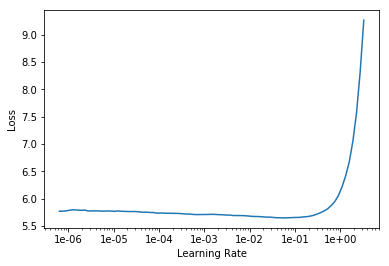

In [0]:
learn.lr_find()
learn.recorder.plot()

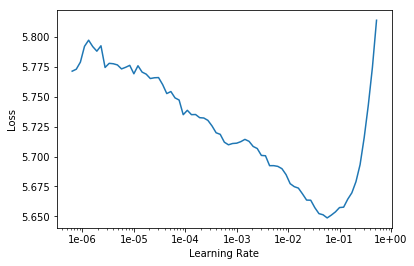

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.freeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('12train_lm_head');
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2)
learn.save('12train_lm_body_1');
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-2)
learn.save('12train_lm_body_2');
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('12train_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,5.046302,4.914785,0.249430,08:06
1,4.798127,4.774272,0.258745,08:18


epoch,train_loss,valid_loss,accuracy,time
0,4.898663,4.841301,0.257930,08:26
1,4.608178,4.672647,0.269854,08:26


epoch,train_loss,valid_loss,accuracy,time
0,4.863044,4.817828,0.261942,08:51
1,4.566602,4.622063,0.275560,08:52


epoch,train_loss,valid_loss,accuracy,time
0,4.340620,4.607429,0.276299,09:14
1,4.293019,4.573222,0.278768,09:14
2,4.222854,4.557788,0.280324,09:14
3,4.152556,4.561572,0.280100,09:14


In [0]:
learn.load('12train_lm_body_3');
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('12train_lm_body_4');

epoch,train_loss,valid_loss,accuracy,time
0,4.176403,4.565760,0.279674,09:13
1,4.215693,4.552057,0.280762,09:13
2,4.142425,4.549404,0.281117,09:14
3,4.019224,4.556902,0.280796,09:14


In [0]:
learn.save_encoder('12train_lm_enc')

### Classifier

In [0]:
data_clas = TextClasDataBunch.from_csv(subsets , '12train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('12train_word_clas.pkl')

In [0]:
data_clas.show_batch()

text,target
"xxbos বুঝি কোনো xxunk নেই ? ’ ‘ xxunk আমি খুব সুখী । ’ রানু হাসতে লাগল । নীলু হঠাৎ গম্ভীর হয়ে বলল , ‘ তুমি xxunk , একটা খুব xxunk কথা আমাকে বলবে । ’ ‘ বলেছিলাম নাকি ? ’ ‘ হ্যাঁ । আজ সেটা বলতে হবে । তারপর আমি আমার একটা xxunk কথা বলব । ’ রানু হাসতে লাগল । ‘ xxunk কেন রানু ? ’ ‘ তোমার",humayun_ahmed
"xxbos ছিল , দু’দিন পার হবার আগেই ওর xxunk হবে এবং সে বাড়িতে ফিরে আসবে । আমাকে জোর খাটিয়ে কিছু করতে হবে না । কিন্তু সে বাসায় ফিরছে না । আপনি এই চিঠি xxunk এমন ব্যবস্থা করবেন যেন সে বাড়িতে ফিরে আসে । আমি একটি ব্যাপার খুব পরিষ্কার করে আপনাকে জানাতে চাই , তা হল — ও বোকা হোক , যা হোক , ওকে আমি অসম্ভব ভালবাসি । ভালবাসা মাপার",humayun_ahmed
"xxbos হাঁ হাঁ বিদ্যা কি একটা , – রসুন , xxunk xxunk কি বলে বলুন দেখি ? ” “ xxunk । ” “ আর ? ” “ xxunk , xxunk , বারণ , নাগ , গজ _ _ _ ” “ হাঁ হাঁ , স্মরণ হইয়াছে ; xxunk নাম ‘ xxunk xxunk ’ । ” “ xxunk ! চমৎকার উপাধি ! যেমন নাম , তেমনই উপাধি । xxunk সহিত আলাপ",bongkim
"xxbos xxunk । xxunk , xxunk , পরস্পরকে অবিশ্বাস , xxunk চক্রান্ত , গুপ্তচরবৃত্তি একদিন তাদের টেনে নিয়ে যাবে xxunk তলায় । এ আমি স্পষ্ট দেখতে পাচ্ছি । এই xxunk xxunk xxunk xxunk মধ্যে দিনরাত xxunk বিষাক্ত হাওয়ায় কখনোই নিজের স্বভাবে সেই xxunk রক্ষা করতে পারব না যাতে পৃথিবীতে কোনো বড়ো কাজ করতে পারা যায় । ” “ আচ্ছা অন্তু , তুমি যাকে xxunk বল সে কি আমাদেরই দেশে ?",robindronath
"xxbos পর্যন্ত কার কার সঙ্গে আলাপ হল ? ’ xxunk জন্য মোটেই তৈরি ছিলাম না , তাই xxunk কী রকম xxunk গেলাম । xxunk গিলে বললাম , ‘ একেবারে xxunk থেকে শুরু করতে হবে নাকি ? ’ ‘ দূর xxunk । এখন যারা xxunk রয়েছে , তার মধ্যে xxunk ’ ‘ এক — xxunk । ’ ‘ পদবি ? ’ ‘ দত্ত । ‘ ‘ তোর xxunk । ’ ‘",shottojit_roy


In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [0]:
learn_cls.load_encoder('12train_lm_enc')

In [0]:
learn_cls.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


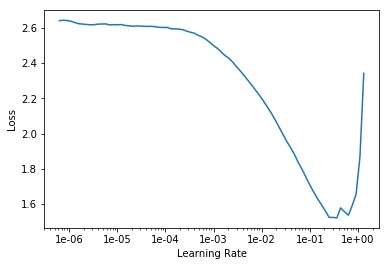

In [0]:
learn_cls.lr_find()
learn_cls.recorder.plot()

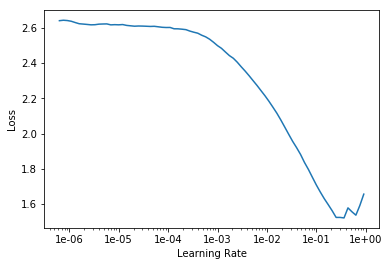

In [0]:
learn_cls.recorder.plot(skip_end=7)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('12train_word_cls_1')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.8**4),1e-2), moms=(0.8,0.7))
learn_cls.save('12train_word_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.8**4),5e-3), moms=(0.8,0.7))
learn_cls.save('12train_word_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.8**4),1e-3), moms=(0.8,0.7))
learn_cls.save('12train_word_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.272263,0.035070,0.988868,02:15
1,0.062596,0.028063,0.991651,02:18


epoch,train_loss,valid_loss,accuracy,time
0,0.095111,0.035957,0.987941,02:36
1,0.033744,0.026040,0.991651,02:35


epoch,train_loss,valid_loss,accuracy,time
0,0.028033,0.029904,0.990724,03:41
1,0.016169,0.018175,0.993506,03:42


epoch,train_loss,valid_loss,accuracy,time
0,0.016793,0.019068,0.992579,04:36
1,0.007894,0.015790,0.993506,04:39
2,0.008313,0.016995,0.993506,04:39
3,0.009096,0.015241,0.993506,04:36


### Test

In [0]:
pred,targ = testing(subsets/'12test.csv')

1356
Accuracy: 
0.9941002949852508
[('shordindu', 'shottojit_roy'), ('shottojit_roy', 'shordindu'), ('shirshendu', 'shomresh'), ('MZI', 'humayun_ahmed'), ('MZI', 'shottojit_roy'), ('MZI', 'humayun_ahmed'), ('robindronath', 'tarashonkor'), ('robindronath', 'shunil_gongopaddhay')]


In [0]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average=None) #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(array([0.986547, 1.      , 0.991228, 0.991071, 0.995556, 0.995595, 0.99115 , 1.      , 0.986784, 0.995595, 0.995595,
        1.      ]), 0.9940934053267015)

##  14 Authors

### LM

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(subsets, '14train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('14train_word_lm.pkl')

In [0]:
data_lm_AA = load_data(subsets, '14train_word_lm.pkl',bs=bs)
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(pt/'models'/'word_news_lm_30');

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


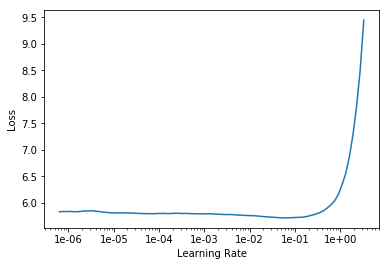

In [0]:
learn.lr_find()
learn.recorder.plot()

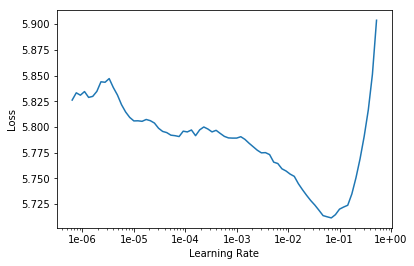

In [0]:
learn.recorder.plot(skip_end=15)

okay this is running

In [0]:
learn.freeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('14train_lm_head');
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2)
learn.save('14train_lm_body_1');
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-2)
learn.save('14train_lm_body_2');
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('14train_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,5.054683,4.947225,0.245920,07:59
1,4.784858,4.809151,0.254826,08:04


epoch,train_loss,valid_loss,accuracy,time
0,4.934630,4.875162,0.255339,08:11
1,4.633934,4.711006,0.265820,08:11


epoch,train_loss,valid_loss,accuracy,time
0,4.876906,4.851674,0.258199,08:36
1,4.550451,4.657775,0.272065,08:37


epoch,train_loss,valid_loss,accuracy,time
0,4.379862,4.642622,0.272481,08:58
1,4.339423,4.609529,0.274564,08:58
2,4.246244,4.594714,0.276288,08:58


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('14train_lm_body_3');
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('14train_lm_body_4');

epoch,train_loss,valid_loss,accuracy,time
0,4.205941,4.602735,0.275397,08:58
1,4.139445,4.594129,0.276131,08:58
2,4.120026,4.585245,0.276845,08:58
3,4.022110,4.594474,0.276384,08:58


In [0]:
learn.save_encoder('14train_lm_enc')

### Classifier

In [0]:
data_clas = TextClasDataBunch.from_csv(subsets , '14train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('14train_word_clas.pkl')

In [0]:
data_clas.show_batch()

text,target
"xxbos তাদের মধ্যে কেউ তাকে খুন করেছে ? ’ ‘ কলকাতার xxunk যাদের নাম আছে তাদের সওয়াল করলে xxunk আন্দাজ করা xxunk , এবার তিন নম্বর মক্কেলের সঙ্গে দেখা করা যাক । ’ ‘ চলুন । ’ তিন নম্বর ঘরে xxunk সান্যাল বিছানায় xxunk হয়ে শুয়ে xxunk , xxunk শুনে ঘাড় তুললেন । xxunk , ‘ কে ? ’ xxunk সংক্ষেপে xxunk , ‘ xxunk । ’ xxunk উঠে xxunk",shordindu
"xxbos xxunk – — xxunk - xxunk – xxunk - xxunk – xxunk - xxunk — পাগল হাসতে হাসতে সুর করে এবার বলে – xxunk xxunk - xxunk – xxunk - xxunk ! – xxunk পিছনে – – xxunk - xxunk — xxunk - xxunk – — আগে চলে লক্ষ্মী — – xxunk - xxunk — xxunk - xxunk – xxunk এস xxunk । বরের xxunk সামনে আছে রতন ,",tarashonkor
"xxbos খোল । ’ আবার খেলোয়াড়দের মধ্যে মুখ xxunk । তারপর xxunk , বোধ হয় দোকানের মালিক xxunk xxunk , xxunk গেল । xxunk জানালা হইতে xxunk xxunk সম্মুখে xxunk । দ্বার xxunk । xxunk xxunk লোকটা দুইজন ইউনিফর্ম পরা xxunk কর্মচারীকে xxunk এক পা xxunk xxunk , ‘ কে ! কি চাই ? ’ xxunk xxunk , ‘ তুমি xxunk দাস ? ’ ‘ হ্যাঁ । কি চাই ?",shordindu
"xxbos xxunk টাকা আদায়ের জন্যে অল্প যা xxunk করেন । তারপর আবার নিজের ঘরেই বন্দি । আর xxunk তো আছে তার অসংখ্য বন্ধুবান্ধব নিয়ে । শুধু মেয়ে বন্ধু নয় , তার আবার অনেক xxunk আছে । xxunk আছে xxunk । তবে সে একটু বাড়াবাড়ি করছে । কাল তার কাছে একটি ছেলে এসেছিল , সে রাত আটটা পর্যন্ত ছিল । এ সব ভালো xxunk । নীলু উঁকি দিয়ে দেখেছে , ছেলেটি",humayun_ahmed
"xxbos হোক তারপর বলবেন । ’ ‘ রশীদকে দেখে এত মনটা খারাপ হয়েছে । ’ ‘ আপনি তাহলে দুপুরে কিছু খাবেন না ? ’ ‘ জ্বি না । ’ ‘ তাহলে আমি উঠি । আগামী কাল চাকরির খবরটা নিয়ে আমার এক কাজ করব । সরাসরি আপনার দেশের বাড়িতে চলে যাব । ’ ‘ সত্যি যাবেন হিমু ভাই ? ’ ‘ যাব । ’ ‘ আপনার ভাবীর শরীরটা খারাপ , আপনাকে",humayun_ahmed


In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [0]:
learn_cls.load_encoder('14train_lm_enc')

In [0]:
learn_cls.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


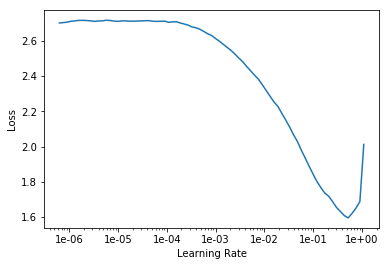

In [0]:
learn_cls.lr_find()
learn_cls.recorder.plot()

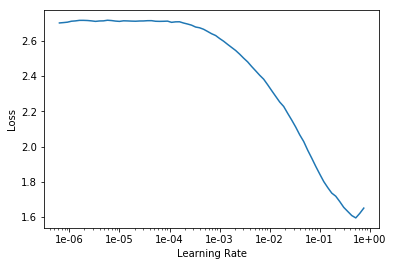

In [0]:
learn_cls.recorder.plot(skip_end=7)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('14train_word_cls_1')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.8**4),1e-2), moms=(0.8,0.7))
learn_cls.save('14train_word_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.8**4),5e-3), moms=(0.8,0.7))
learn_cls.save('14train_word_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.8**4),1e-3), moms=(0.8,0.7))
learn_cls.save('14train_word_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.349487,0.072313,0.979068,02:13
1,0.090491,0.051185,0.982873,02:16


epoch,train_loss,valid_loss,accuracy,time
0,0.122782,0.060298,0.985728,02:32
1,0.044465,0.027303,0.991437,02:32


epoch,train_loss,valid_loss,accuracy,time
0,0.038449,0.036710,0.991437,03:37
1,0.021468,0.021835,0.995243,03:34


epoch,train_loss,valid_loss,accuracy,time
0,0.014943,0.023682,0.993340,04:29
1,0.013850,0.021734,0.993340,04:31
2,0.011146,0.021436,0.993340,04:31
3,0.011095,0.019308,0.993340,04:32


### Test

In [0]:
pred,targ = testing(subsets/'14test.csv')

1316
Accuracy: 
0.986322188449848
[('manik_bandhopaddhay', 'robindronath'), ('tarashonkor', 'manik_bandhopaddhay'), ('shordindu', 'bongkim'), ('shordindu', 'robindronath'), ('shordindu', 'bongkim'), ('shordindu', 'robindronath'), ('shirshendu', 'robindronath'), ('shirshendu', 'MZI'), ('shirshendu', 'robindronath'), ('shirshendu', 'manik_bandhopaddhay'), ('MZI', 'toslima_nasrin'), ('shorotchandra', 'tarashonkor'), ('shorotchandra', 'bongkim'), ('robindronath', 'bongkim'), ('robindronath', 'tarashonkor'), ('shunil_gongopaddhay', 'shottojit_roy'), ('shunil_gongopaddhay', 'shomresh'), ('shunil_gongopaddhay', 'shottojit_roy')]


In [0]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average=None) #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(array([0.989362, 0.979167, 1.      , 0.984127, 1.      , 0.963351, 0.978261, 0.994709, 0.978261, 0.989247, 0.989474,
        0.983784, 0.984127, 0.994709]), 0.9863269736256642)